## Principal Component Analysis for NBA Stats

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Preprocessing the Data for PCA

In [2]:
# Load the NBA Stats dataset
file_path = '../Resources/dataset_clean.csv'
a_df = pd.read_csv(file_path)
a_df.head(10)

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,...,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,...,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,...,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,...,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,...,48,42,108,227,887,1997,225,1976,10,81.0
5,2007,Shareef Abdur-Rahim,30,80,2015,13.1,0.524,0.031,0.358,7.0,...,53,40,116,243,793,1997,225,1976,11,81.0
6,2003,Courtney Alexander,25,66,1360,9.3,0.459,0.113,0.289,3.3,...,31,6,68,125,523,2001,205,1977,3,77.0
7,2003,Malik Allen,24,80,2318,9.9,0.455,0.005,0.153,6.5,...,37,78,128,234,767,2002,255,1978,2,82.0
8,2004,Malik Allen,25,45,616,10.5,0.449,0.000,0.167,7.9,...,12,28,27,81,191,2002,255,1978,3,82.0
9,2005,Malik Allen,26,36,519,14.2,0.512,0.000,0.158,9.0,...,9,22,18,53,194,2002,255,1978,4,82.0


In [3]:
# List columns 
a_df.columns

Index(['Year', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA',
       '2P', '2PA', 'eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'year_start', 'weight', 'year_born',
       'Status', 'height(inch)'],
      dtype='object')

In [4]:
pd.set_option('max_columns', 500)

a_df.head(10)

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0
5,2007,Shareef Abdur-Rahim,30,80,2015,13.1,0.524,0.031,0.358,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,1.1,1.7,2.8,0.067,-2.1,0.0,-2.1,-0.1,310,654,3,20,307,634,0.476,170,234,122,276,398,109,53,40,116,243,793,1997,225,1976,11,81.0
6,2003,Courtney Alexander,25,66,1360,9.3,0.459,0.113,0.289,3.3,6.8,5.0,9.8,1.2,0.3,10.7,21.3,0.1,1.0,1.1,0.040,-3.2,-2.3,-5.5,-1.2,193,505,19,57,174,448,0.401,118,146,39,79,118,79,31,6,68,125,523,2001,205,1977,3,77.0
7,2003,Malik Allen,24,80,2318,9.9,0.455,0.005,0.153,6.5,14.9,10.6,4.4,0.9,2.6,13.2,19.7,-1.7,2.6,0.9,0.018,-4.6,0.6,-3.9,-1.1,335,790,0,4,335,786,0.424,97,121,134,291,425,54,37,78,128,234,767,2002,255,1978,2,82.0
8,2004,Malik Allen,25,45,616,10.5,0.449,0.000,0.167,7.9,14.7,11.3,4.7,1.1,3.6,11.3,18.3,-0.1,0.8,0.7,0.051,-4.7,0.2,-4.6,-0.4,83,198,0,0,83,198,0.419,25,33,42,77,119,16,12,28,27,81,191,2002,255,1978,3,82.0
9,2005,Malik Allen,26,36,519,14.2,0.512,0.000,0.158,9.0,13.3,11.0,5.7,0.9,3.2,8.7,18.1,0.6,0.5,1.1,0.100,-2.0,-0.3,-2.3,0.0,84,177,0,0,84,177,0.475,26,28,40,59,99,18,9,22,18,53,194,2002,255,1978,4,82.0


In [5]:
# Verify datatypes
a_df.dtypes

Year              int64
Player           object
Age               int64
G                 int64
MP                int64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
FG                int64
FGA               int64
3P                int64
3PA               int64
2P                int64
2PA               int64
eFG%            float64
FT                int64
FTA               int64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK               int64
TOV               int64
PF              

In [6]:
# Create a new DataFrame that holds only the player names.
player_name = pd.DataFrame(a_df['Player'])

print(player_name.shape)
player_name.head(10)

(6273, 1)


,Player
0,Tariq Abdul-Wahad
1,Shareef Abdur-Rahim
2,Shareef Abdur-Rahim
3,Shareef Abdur-Rahim
4,Shareef Abdur-Rahim
5,Shareef Abdur-Rahim
6,Courtney Alexander
7,Malik Allen
8,Malik Allen
9,Malik Allen


In [7]:
a_df.head()

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0


In [8]:
# Drop unused columns
df = a_df.drop(['Player', 'year_born'], axis=1)
df.head(10)

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status,height(inch)
0,2003,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,6,78.0
1,2003,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,7,81.0
2,2004,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,8,81.0
3,2005,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,9,81.0
4,2006,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,10,81.0
5,2007,30,80,2015,13.1,0.524,0.031,0.358,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,1.1,1.7,2.8,0.067,-2.1,0.0,-2.1,-0.1,310,654,3,20,307,634,0.476,170,234,122,276,398,109,53,40,116,243,793,1997,225,11,81.0
6,2003,25,66,1360,9.3,0.459,0.113,0.289,3.3,6.8,5.0,9.8,1.2,0.3,10.7,21.3,0.1,1.0,1.1,0.040,-3.2,-2.3,-5.5,-1.2,193,505,19,57,174,448,0.401,118,146,39,79,118,79,31,6,68,125,523,2001,205,3,77.0
7,2003,24,80,2318,9.9,0.455,0.005,0.153,6.5,14.9,10.6,4.4,0.9,2.6,13.2,19.7,-1.7,2.6,0.9,0.018,-4.6,0.6,-3.9,-1.1,335,790,0,4,335,786,0.424,97,121,134,291,425,54,37,78,128,234,767,2002,255,2,82.0
8,2004,25,45,616,10.5,0.449,0.000,0.167,7.9,14.7,11.3,4.7,1.1,3.6,11.3,18.3,-0.1,0.8,0.7,0.051,-4.7,0.2,-4.6,-0.4,83,198,0,0,83,198,0.419,25,33,42,77,119,16,12,28,27,81,191,2002,255,3,82.0
9,2005,26,36,519,14.2,0.512,0.000,0.158,9.0,13.3,11.0,5.7,0.9,3.2,8.7,18.1,0.6,0.5,1.1,0.100,-2.0,-0.3,-2.3,0.0,84,177,0,0,84,177,0.475,26,28,40,59,99,18,9,22,18,53,194,2002,255,4,82.0


In [9]:
df.groupby('Year').count()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status,height(inch)
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
2004,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
2005,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
2006,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418
2007,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416,416
2008,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409,409
2009,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404
2010,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411
2011,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418


In [10]:
# summarize the nba_data
df.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status,height(inch)
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,2010.168181,26.614220,58.027579,1368.446517,13.204193,0.518046,0.224275,0.296625,5.653228,14.582544,10.114937,12.941527,1.582321,1.620979,13.908704,18.665407,1.509740,1.388682,2.898725,0.081558,-1.170333,-0.208624,-1.378734,0.689287,208.986131,461.611988,38.424040,107.736490,170.562092,353.875498,0.481122,103.189224,136.151762,63.051331,175.465328,238.516659,122.077794,42.679420,27.359955,78.094532,119.010681,559.585525,2005.327754,221.479675,5.840427,79.111908
std,4.311041,4.225402,20.839700,860.169059,4.656013,0.062482,0.202405,0.161223,4.027958,5.680427,4.491148,9.100296,0.654119,1.593786,4.569770,4.910037,2.149083,1.202735,3.021776,0.063926,2.764516,1.776342,3.276796,1.420190,168.598866,361.634063,48.650569,127.987099,147.518044,295.905395,0.063959,107.157123,134.562286,61.459045,140.726003,194.607052,133.931774,33.637848,34.168039,61.153452,68.348529,462.276023,5.772833,27.041645,4.017287,3.547497
min,2003.000000,18.000000,11.000000,31.000000,-9.100000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000,-3.300000,-0.600000,-2.100000,-0.325000,-16.400000,-8.200000,-17.900000,-2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.091000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1985.000000,135.000000,1.000000,65.000000
25%,2006.000000,23.000000,43.000000,600.000000,10.300000,0.487000,0.013000,0.189000,2.200000,10.000000,6.300000,6.400000,1.100000,0.500000,10.800000,15.200000,0.000000,0.400000,0.500000,0.044000,-2.900000,-1.400000,-3.300000,-0.200000,70.000000,162.000000,0.000000,3.000000,52.000000,116.000000,0.448000,27.000000,38.000000,19.000000,67.000000,90.000000,29.000000,15.000000,6.000000,29.000000,62.000000,182.000000,2001.000000,200.000000,2.000000,77.000000
50%,2010.000000,26.000000,64.000000,1325.000000,13.000000,0.524000,0.209000,0.268000,4.400000,13.600000,9.200000,10.000000,1.500000,1.100000,13.300000,18.400000,0.800000,1.100000,2.000000,0.084000,-1.200000,-0.300000,-1.300000,0.200000,172.000000,383.000000,16.000000,51.000000,131.000000,279.000000,0.485000,69.000000,94.000000,42.000000,145.000000,191.000000,77.000000,36.000000,16.000000,64.000000,119.000000,452.000000,2005.000000,220.000000,5.000000,80.000000
75%,2014.000000,30.000000,76.000000,2066.000000,15.900000,0.556000,0.382000,0.371000,8.600000,18.400000,13.400000,17.300000,2.000000,2.200000,16.200000,21.800000,2.400000,2.000000,4.300000,0.121000,0.500000,0.900000,0.700000,1.200000,310.000000,679.000000,64.000000,182.000000,249.000000,513.000000,0.518000,143.000000,192.000000,89.000000,243.000000,332.000000,164.000000,62.000000,34.000000,112.000000,170.000000,828.000000,2010.000000,240.000000,9.000000,82.000000
max,2017.000000,42.000000,85.000000,3401.000000,31.700000,0.737000,0.941000,2.400000,27.200000,38.600000,27.000000,57.300000,5.900000,15.100000,57.100000,41.700000,14.800000,9.100000,20.300000,0.325000,12.400000,7.500000,15.600000,12.400000,978.000000,2173.000000,402.000000,886.000000,798.000000,1655.000000,0.800000,756.000000,916.000000,440.000000,894.000000,1226.000000,925.000000,217.000000,307.000000,464.000000,344.000000,2832.000000,2017.000000,308.000000,21.000000,90.

In [11]:
df.dropna()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,Status,height(inch)
0,2003,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,6,78.0
1,2003,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,7,81.0
2,2004,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,8,81.0
3,2005,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,9,81.0
4,2006,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,10,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2017,22,30,557,8.9,0.511,0.371,0.192,3.0,11.2,7.0,7.0,2.5,1.7,15.4,17.2,-0.4,0.7,0.3,0.030,-3.4,0.7,-2.7,-0.1,73,167,18,62,55,105,0.491,21,32,15,54,69,25,27,10,33,60,185,2017,218,1,79.0
6269,2017,24,14,44,6.7,0.437,0.929,0.143,9.9,14.9,12.4,6.1,3.3,1.8,25.2,19.1,-0.1,0.1,0.0,-0.039,-4.0,0.0,-4.0,0.0,4,14,4,13,0,1,0.429,1,2,4,6,10,2,3,1,5,4,13,2017,240,1,82.0
6270,2017,20,19,108,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10,31,0,0,10,31,0.323,3,5,11,24,35,4,2,5,3,17,23,2017,240,1,84.0
6271,2017,22,44,843,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88,221,33,99,55,122,0.473,31,40,15,110,125,36,15,16,40,78,240,2017,215,1,80.0


In [12]:
# Standardize the data with StandardScaler().
nba_scaled = StandardScaler().fit_transform(df)
print(nba_scaled[0:5])

[[-1.66288214  0.3279903  -2.11284658 -1.35384937 -0.17273505 -0.76901737
  -1.02413819 -1.20107237  0.48335338 -0.10256107  0.15254842  0.27017459
  -0.12586035 -0.32690739 -0.7897534  -0.74657275 -0.60948998 -0.98839429
  -0.82697205  0.35109489 -0.01073215  0.51155514  0.26819008 -0.41496879
  -1.0794891  -1.11616743 -0.78985926 -0.83402936 -0.97326084 -1.0033584
  -0.23644875 -0.93504946 -0.96730028 -0.79817774 -1.06218637 -1.02017107
  -0.75475631 -1.09050803 -0.71300249 -1.16265226 -1.36093778 -1.08728458
  -1.26945272  0.05622611  0.03972469 -0.31345958]
 [-1.66288214 -0.1453752   1.10242724  1.99808452  1.4382135   0.76753748
  -0.85614517  0.9948155   0.25989729  0.56645605  0.53110094  0.19324788
  -0.12586035 -0.45240478 -0.19886698  1.12728976  2.74104319  0.75776542
   2.25093408  1.08637635  1.18306222 -0.10774447  0.93963104  1.48633723
   2.11770302  1.99496008 -0.35817522 -0.37300865  2.53845392  2.59943153
   0.09191338  3.28339183  3.00887064  1.82166178  2.32054273 

### Reducing Data Dimensions Using PCA

In [13]:
# Using PCA to reduce dimension to three principal components.
n_comp = 10

pca = PCA(n_components=n_comp)

nba_pca = pca.fit_transform(nba_scaled)

nba_pca

array([[-4.35372329e+00,  3.96279990e-01, -7.57770820e-01, ...,
        -2.09040989e+00, -8.86635446e-01,  4.54190999e-01],
       [ 9.24611708e+00,  1.13013769e+00,  2.59170625e+00, ...,
        -2.44962685e-01, -1.60417288e-01, -6.85464079e-01],
       [ 7.33962373e+00,  1.68114340e+00,  2.33880898e+00, ...,
         1.45071817e-03, -8.83474021e-01, -8.70881389e-01],
       ...,
       [-6.45255694e+00,  3.02955215e+00,  1.63448104e+00, ...,
        -1.42880632e+00,  8.78297028e-01, -9.47944099e-02],
       [-3.79336388e+00, -4.93110571e-01, -6.77624871e-01, ...,
         7.19909322e-01,  4.08452672e-01,  5.37315673e-01],
       [-2.30507761e+00,  3.19674094e+00, -1.26786408e+00, ...,
        -6.56645762e-02, -4.10055238e-01,  9.35336204e-01]])

In [14]:
pcs_df = pd.DataFrame(data=nba_pca, columns=[f'PC {x}' for x in range(n_comp)], index=player_name.index)

print(pcs_df.shape)
pcs_df.head(10)

(6273, 10)


,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-4.353723,0.396280,-0.757771,1.552937,0.849980,-1.453094,-0.250374,-2.090410,-0.886635,0.454191
1,9.246117,1.130138,2.591706,0.550848,-0.312870,-2.453398,-1.121661,-0.244963,-0.160417,-0.685464
2,7.339624,1.681143,2.338809,0.638860,-0.822173,-2.426135,-1.030557,0.001451,-0.883474,-0.870881
3,3.383423,1.224363,0.135326,1.038618,-0.067390,-2.468525,-0.819695,-0.299509,-0.662392,-0.374608
4,3.826928,1.411336,0.020180,1.524679,-0.009434,-1.693727,-1.271480,0.296495,-0.703731,0.251393
5,2.035078,1.598134,1.821469,1.752689,-1.430415,-0.511225,-0.986360,0.868639,-0.990614,-0.408152
6,-2.032659,-1.764169,2.577875,-0.209751,-1.269050,-1.089746,-1.809447,-0.700833,-0.661326,0.266224
7,0.810980,2.561590,3.926882,-0.211326,-2.624332,1.343700,-1.655315,-0.194368,-1.000675,1.046917
8,-3.793018,2.145929,1.206509,0.011726,-0.866807,-0.485906,-0.451518,-1.555398,0.081540,1.079208
9,-3.204877,1.965018,-0.652573,-0.110192,-0.566502,-1.599916,-0.478379,-1.551183,-0.494850,1.107923


### Clustering Crytocurrencies Using K-Means

In [15]:
# Initialize the K-Means model.
model =KMeans(n_clusters=10, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([2, 8, 8, ..., 4, 6, 9])

In [16]:
pcs_df.shape

(6273, 10)

AttributeError: 'KMeans' object has no attribute 'lables_'

<AxesSubplot:xlabel='cluster', ylabel='VORP'>

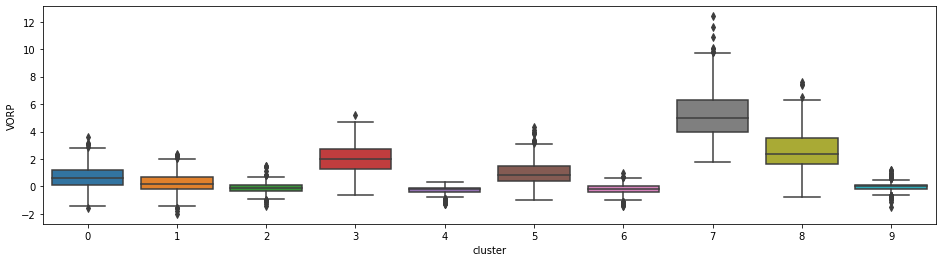

In [18]:
import seaborn as sns

cluster_df = pd.DataFrame(predictions, columns=['cluster'])
cluster_vorp = cluster_df.join(df)

plt.figure(figsize=(16,4))
sns.boxplot(cluster_vorp['cluster'], cluster_vorp['VORP'])

In [19]:
cluster_vorp.groupby('cluster').describe()

Year                                                          \
         count         mean       std     min      25%     50%     75%   
cluster                                                                  
0        807.0  2009.717472  4.335723  2003.0  2006.00  2009.0  2014.0   
1        701.0  2009.496434  4.293058  2003.0  2006.00  2009.0  2013.0   
2        545.0  2009.282569  4.284566  2003.0  2005.00  2009.0  2013.0   
3        615.0  2009.391870  4.117287  2003.0  2006.00  2009.0  2013.0   
4        500.0  2008.930000  4.121538  2003.0  2005.00  2009.0  2012.0   
5        736.0  2012.076087  3.892036  2003.0  2009.00  2013.0  2015.0   
6        864.0  2011.546296  4.145129  2003.0  2008.00  2012.0  2015.0   
7        172.0  2010.197674  4.633516  2003.0  2006.00  2010.0  2014.0   
8        446.0  2010.089686  4.234267  2003.0  2006.25  2010.0  2014.0   
9        887.0  2009.997745  4.200934  2003.0  2006.00  2010.0  2014.0   

                   Age                                                     \
            max  count       mean       std   min   25%   50%   75%   max   
cluster                                                                     
0        2017.0  807.0  26.400248  4.164681  19.0  23.0  26.0  29.0  39.0   
1        2017.0  701.0  26.590585  3.805165  19.0  24.0  26.0  29.0  38.0   
2        2017.0  545.0  32.594495  2.956605  25.0  30.0  32.0  35.0  42.0   
3        2017.0  615.0  26.479675  3.825488  19.0  24.0  26.0  29.0  38.0   
4        2017.0  500.0  25.878000  4.282499  18.0  23.0  25.0  29.0  39.0   
5        2017.0  736.0  27.149457  3.892354  19.0  24.0  27.0  30.0  40.0   
6        2017.0  864.0  23.831019  2.500366  18.0  22.0  24.0  25.0  33.0   
7        2017.0  172.0  26.395349  3.042695  20.0  24.0  26.0  28.0  35.0   
8        2017.0  446.0  26.208520  3.755328  19.0  23.0  26.0  29.0  38.0   
9        2017.0  887.0  26.174746  3.920185  18.0  23.0  26.0  29.0  38.0   

             G                                                         MP  \
         count       mean        std   min   25%   50%   75%   max  count   
cluster                                                                     
0        807.0  70.356877  10.103142  25.0  64.0  72.0  79.0  82.0  807.0   
1        701.0  67.821683  12.010276  25.0  61.0  70.0  78.0  84.0  701.0   
2        545.0  45.073394  17.960489  11.0  30.0  46.0  58.0  82.0  545.0   
3        615.0  74.572358   8.153308  39.0  71.0  78.0  81.0  83.0  615.0   
4        500.0  27.722000  13.668004  11.0  17.0  24.0  36.0  81.0  500.0   
5        736.0  71.269022  10.066225  22.0  65.0  74.0  79.0  82.0  736.0   
6        864.0  44.539352  17.568494  11.0  31.0  45.0  58.0  82.0  864.0   
7        172.0  76.767442   5.498909  51.0  75.0  78.0  81.0  82.0  172.0   
8        446.0  74.869955   7.499881  41.0  71.0  77.0  81.0  85.0  446.0   
9        887.0  42.689966  17.435199  11.0  29.0  43.0  56.0  82.0  887.0   

                                                                            \
                mean         std     min      25%     50%      75%     max   
cluster                                                                      
0        1620.488228  387.683788   739.0  1329.50  1589.0  1899.00  2654.0   
1        1684.131241  393.496277   700.0  1392.00  1669.0  1976.00  2906.0   
2         737.440367  392.143263    73.0   406.00   718.0   991.00  1948.0   
3        2545.960976  366.281817  1375.0  2310.00  2566.0  2809.00  3351.0   
4         264.184000  198.124195    31.0   118.00   206.5   358.50  1320.0   
5        1812.546196  423.864611   678.0  1502.50  1789.0  2108.25  2988.0   
6         655.943287  362.879207    33.0   361.75   632.0   915.25  1817.0   
7        2838.133721  302.954013  1921.0  2680.50  2862.5  3038.25  3401.0   
8        2444.636771  344.200749  1349.0  2205.50  2444.5  2676.50  3263.0   
9         582.813980  321.325075    39.0   327.00   566.0   824.00  1844.0   

           PER              

In [20]:
# Create a new DataFrame with predicted clusters.
clustered_df = pd.DataFrame({"PC 1": pcs_df["PC 1"],
                             "PC 2": pcs_df["PC 2"],
                             "PC 3": pcs_df["PC 3"],
                             "PC 4": pcs_df["PC 4"],
                             "PC 5": pcs_df["PC 5"],
                             "PC 6": pcs_df["PC 6"],
                             "PC 7": pcs_df["PC 7"],
                             "PC 8": pcs_df["PC 8"],
                             "PC 9": pcs_df["PC 9"]})

print(clustered_df.shape)
clustered_df.head(10)

(6273, 9)


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,0.396280,-0.757771,1.552937,0.849980,-1.453094,-0.250374,-2.090410,-0.886635,0.454191
1,1.130138,2.591706,0.550848,-0.312870,-2.453398,-1.121661,-0.244963,-0.160417,-0.685464
2,1.681143,2.338809,0.638860,-0.822173,-2.426135,-1.030557,0.001451,-0.883474,-0.870881
3,1.224363,0.135326,1.038618,-0.067390,-2.468525,-0.819695,-0.299509,-0.662392,-0.374608
4,1.411336,0.020180,1.524679,-0.009434,-1.693727,-1.271480,0.296495,-0.703731,0.251393
5,1.598134,1.821469,1.752689,-1.430415,-0.511225,-0.986360,0.868639,-0.990614,-0.408152
6,-1.764169,2.577875,-0.209751,-1.269050,-1.089746,-1.809447,-0.700833,-0.661326,0.266224
7,2.561590,3.926882,-0.211326,-2.624332,1.343700,-1.655315,-0.194368,-1.000675,1.046917
8,2.145929,1.206509,0.011726,-0.866807,-0.485906,-0.451518,-1.555398,0.081540,1.079208
9,1.965018,-0.652573,-0.110192,-0.566502,-1.599916,-0.478379,-1.551183,-0.494850,1.107923


### Visualizations

In [21]:
#df.plot(x ='Age', y='year_start', kind = 'scatter')	
#plt.show()

In [22]:
#df.plot(x ='weight', y='VORP', kind = 'bar')
#plt.show()

### Resources

In [24]:
### PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
# https://towardsdatascience.com/redefining-nba-player-classifications-using-clustering-36a348fa54a8

### Creating Cluster Dataset

In [29]:
model.labels_

array([2, 8, 8, ..., 4, 6, 9])

In [30]:
a_df['cluster'] = model.labels_
a_df

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch),cluster
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0,2
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0,8
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0,8
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0,0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2017,Troy Williams,22,30,557,8.9,0.511,0.371,0.192,3.0,11.2,7.0,7.0,2.5,1.7,15.4,17.2,-0.4,0.7,0.3,0.030,-3.4,0.7,-2.7,-0.1,73,167,18,62,55,105,0.491,21,32,15,54,69,25,27,10,33,60,185,2017,218,1994,1,79.0,6
6269,2017,Kyle Wiltjer,24,14,44,6.7,0.437,0.929,0.143,9.9,14.9,12.4,6.1,3.3,1.8,25.2,19.1,-0.1,0.1,0.0,-0.039,-4.0,0.0,-4.0,0.0,4,14,4,13,0,1,0.429,1,2,4,6,10,2,3,1,5,4,13,2017,240,1992,1,82.0,4
6270,2017,Stephen Zimmerman,20,19,108,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10,31,0,0,10,31,0.323,3,5,11,24,35,4,2,5,3,17,23,2017,240,1996,1,84.0,4
6271,2017,Paul Zipser,22,44,843,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88,221,33,99,55,122,0.473,31,40,15,110,125,36,15,16,40,78,240,2017,215,1994,1,80.0,6


In [32]:
max(a_df["Status"])

21

In [60]:
cols = ["Player","year_born"]
for i in range(1,22):
    cols.extend([f"Cluster {i}",f"VORP {i}",f"WS {i}"])
b_df = pd.DataFrame(columns = cols)
b_df.head()

,Player,year_born,Cluster 1,VORP 1,WS 1,Cluster 2,VORP 2,WS 2,Cluster 3,VORP 3,WS 3,Cluster 4,VORP 4,WS 4,Cluster 5,VORP 5,WS 5,Cluster 6,VORP 6,WS 6,Cluster 7,VORP 7,WS 7,Cluster 8,VORP 8,WS 8,Cluster 9,VORP 9,WS 9,Cluster 10,VORP 10,WS 10,Cluster 11,VORP 11,WS 11,Cluster 12,VORP 12,WS 12,Cluster 13,VORP 13,WS 13,Cluster 14,VORP 14,WS 14,Cluster 15,VORP 15,WS 15,Cluster 16,VORP 16,WS 16,Cluster 17,VORP 17,WS 17,Cluster 18,VORP 18,WS 18,Cluster 19,VORP 19,WS 19,Cluster 20,VORP 20,WS 20,Cluster 21,VORP 21,WS 21


In [61]:
for index, row in a_df.iterrows():
    subset = a_df[(a_df["Player"]==row["Player"]) & (a_df["year_born"]==row["year_born"])]
    if (subset["Player"].iloc[0],subset["year_born"].iloc[0]) not in zip(b_df["Player"],b_df["year_born"]):
        new_row = {}
        new_row["Player"] = subset["Player"].iloc[0]
        new_row["year_born"] = subset["year_born"].iloc[0]
        for index2, sub in subset.iterrows():
            new_row[f"Cluster {sub['Status']}"] = sub["cluster"]
            new_row[f"VORP {sub['Status']}"] = sub["VORP"]
            new_row[f"WS {sub['Status']}"] = sub["WS"]
        b_df = b_df.append(new_row,ignore_index=True)

In [62]:
b_df

,Player,year_born,Cluster 1,VORP 1,WS 1,Cluster 2,VORP 2,WS 2,Cluster 3,VORP 3,WS 3,Cluster 4,VORP 4,WS 4,Cluster 5,VORP 5,WS 5,Cluster 6,VORP 6,WS 6,Cluster 7,VORP 7,WS 7,Cluster 8,VORP 8,WS 8,Cluster 9,VORP 9,WS 9,Cluster 10,VORP 10,WS 10,Cluster 11,VORP 11,WS 11,Cluster 12,VORP 12,WS 12,Cluster 13,VORP 13,WS 13,Cluster 14,VORP 14,WS 14,Cluster 15,VORP 15,WS 15,Cluster 16,VORP 16,WS 16,Cluster 17,VORP 17,WS 17,Cluster 18,VORP 18,WS 18,Cluster 19,VORP 19,WS 19,Cluster 20,VORP 20,WS 20,Cluster 21,VORP 21,WS 21
0,Tariq Abdul-Wahad,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shareef Abdur-Rahim,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.8,9.7,8.0,1.6,8.1,0.0,1.3,5.4,0.0,1.4,6.2,0.0,-0.1,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Courtney Alexander,1977,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.2,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malik Allen,1978,NaN,NaN,NaN,0.0,-1.1,0.9,9.0,-0.4,0.7,9.0,0.0,1.1,9.0,-0.3,1.0,4,-0.5,1.0,9.0,-0.5,1.0,4.0,-0.4,0.3,4.0,-0.3,0.1,4.0,-0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ray Allen,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.2,9.1,3.0,3.3,6.9,7.0,4.4,10.7,7.0,4.2,9.5,3.0,3.0,6.3,3.0,3.4,9.7,3.0,4.3,11.1,3.0,2.6,7.9,3.0,4.1,10.0,5.0,1.8,4.7,5.0,1.1,5.4,5.0,1.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Troy Williams,1994,6.0,-0.1,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Kyle Wiltjer,1992,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,Stephen Zimmerman,1996,4.0,-0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,Paul Zipser,1994,6.0,-0.4,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
b_df.to_csv('clustered_dataset.csv', index=False)